# **Data Preprocessing: connect, Drop NaN, Spliting, FS(GA & MVO)**



### connect to th ds

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb


url1 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/jm1.csv"
url2 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/cm1.csv"
url3 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/kc1.csv"
url4 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/kc2.csv"
url5 = "https://raw.githubusercontent.com/BarahTaijon/SoftWareDefectPrediction/main/Datasets/pc1.csv"

dataset_jm1 = pd.read_csv(url1)
dataset_cm1 = pd.read_csv(url2)
dataset_kc1 = pd.read_csv(url3)
dataset_kc2 = pd.read_csv(url4)
dataset_pc1 = pd.read_csv(url5)


In [2]:
#drop empty rows in jm1 dataset

modi_dataset_jm1 = dataset_jm1.copy()
modi_dataset_jm1  = modi_dataset_jm1.replace(r'^\s*$', float('NaN'), regex = True)
modi_dataset_jm1.dropna(inplace = True)

#modi_dataset_jm1.count()


## Metrics Lists

In [3]:
# 1- Accuracy lists svm
accuracy_jm1 = []
accuracy_cm1 = []
accuracy_kc1 = []
accuracy_kc2 = []
accuracy_pc1 = []

# Accuracy lists rf
accuracy_jm12 = []
accuracy_cm12 = []
accuracy_kc12 = []
accuracy_kc22 = []
accuracy_pc12 = []

In [4]:
# 2- Area Under the Curve (AUC) lists - svm
auc_jm1 = []
auc_cm1 = []
auc_kc1 = []
auc_kc2 = []
auc_pc1 = []

# Area Under the Curve (AUC) lists - rf
auc_jm12 = []
auc_cm12 = []
auc_kc12 = []
auc_kc22 = []
auc_pc12 = []

In [5]:
# 3- Precision lists svm
pre_jm1 = []
pre_cm1 = []
pre_kc1 = []
pre_kc2 = []
pre_pc1 = []

# Precision lists rf
pre_jm12 = []
pre_cm12 = []
pre_kc12 = []
pre_kc22 = []
pre_pc12 = []

In [6]:
# 4- Recall lists svm
recall_jm1 = []
recall_cm1 = []
recall_kc1 = []
recall_kc2 = []
recall_pc1 = []

# Recall lists rf
recall_jm12 = []
recall_cm12 = []
recall_kc12 = []
recall_kc22 = []
recall_pc12 = []

In [7]:
# 5- F1 score lists svm
f1_jm1 = []
f1_cm1 = []
f1_kc1 = []
f1_kc2 = []
f1_pc1 = []

# F1 score lists rf
f1_jm12 = []
f1_cm12 = []
f1_kc12 = []
f1_kc22 = []
f1_pc12 = []

## Time Lists

In [8]:
time_jm1 = []
time_kc1 = []
time_kc2 = []
time_pc1 = []
time_cm1 = []

In [9]:
time_jm12 = []
time_kc12 = []
time_kc22 = []
time_pc12 = []
time_cm12 = []

## 1) DataSet: splitting & Balace [SMOTE]

In [10]:
# split all datasets for: x & y

#-----jm1----------
jm1_x = modi_dataset_jm1.drop('defects', axis=1)
jm1_y = modi_dataset_jm1['defects']

#-----cm1----------
cm1_x = dataset_cm1.drop('defects', axis=1)
cm1_y = dataset_cm1['defects']

#-----kc1----------
kc1_x = dataset_kc1.drop('defects', axis=1)
kc1_y = dataset_kc1['defects']

#-----kc2----------
kc2_x = dataset_kc2.drop('defects', axis=1)
kc2_y = dataset_kc2['defects']

#-----pc1----------
pc1_x = dataset_pc1.drop('defects', axis=1)
pc1_y = dataset_pc1['defects']


In [11]:
#spliting data , feature selection on x[train and test], data balance on train [x,y]

jm1_x_train, jm1_x_test, jm1_y_train, jm1_y_test =  train_test_split(jm1_x, jm1_y, test_size = 0.3)
cm1_x_train, cm1_x_test, cm1_y_train, cm1_y_test =  train_test_split(cm1_x, cm1_y, test_size = 0.3)
kc1_x_train, kc1_x_test, kc1_y_train, kc1_y_test =  train_test_split(kc1_x, kc1_y, test_size = 0.3)
kc2_x_train, kc2_x_test, kc2_y_train, kc2_y_test =  train_test_split(kc2_x, kc2_y, test_size = 0.3)
pc1_x_train, pc1_x_test, pc1_y_train, pc1_y_test =  train_test_split(pc1_x, pc1_y, test_size = 0.3)


In [12]:
# x & y : train
X_kc1, y_kc1 = SMOTE().fit_resample(kc1_x_train, kc1_y_train)
X_kc2, y_kc2 = SMOTE().fit_resample(kc2_x_train, kc2_y_train)
X_cm1, y_cm1 = SMOTE().fit_resample(cm1_x_train, cm1_y_train)
X_pc1, y_pc1 = SMOTE().fit_resample(pc1_x_train, pc1_y_train)
X_jm1, y_jm1 = SMOTE().fit_resample(jm1_x_train, jm1_y_train)

## 2) DataSets Select Feature [GA]

In [13]:
pip install sklearn-genetic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00


In [14]:
from genetic_selection import GeneticSelectionCV
import pandas as pds
import numpy as num

# -------------GA ---------- jm1-------

model = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=40), cv=5, verbose=2,
    scoring="recall", max_features=jm1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model = model.fit(X_jm1, y_jm1)

jm1_ga_x_train = X_jm1[X_jm1.columns[model.support_]] #Balanced feature selected x train
jm1_ga_x_test = jm1_x_test[jm1_x_test.columns[model.support_]]

print(jm1_ga_x_train.shape)

# -------------GA ---------- cm1-------

model2 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=40), cv=5, verbose=0,
    scoring="recall", max_features=cm1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model2 = model2.fit(X_cm1, y_cm1)

cm1_ga_x_train = X_cm1[X_cm1.columns[model2.support_]]
cm1_ga_x_test = cm1_x_test[cm1_x_test.columns[model2.support_]]

print(cm1_ga_x_train.shape)

# -------------GA ---------- kc1-------

model3 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=40), cv=5, verbose=0,
    scoring="recall", max_features=kc1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model3 = model3.fit(X_kc1, y_kc1 )

kc1_ga_x_train = X_kc1[X_kc1.columns[model3.support_]]
kc1_ga_x_test = kc1_x_test[kc1_x_test.columns[model3.support_]]

print(kc1_ga_x_train.shape)

# -------------GA ---------- kc2-------

model4 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=40), cv=5, verbose=0,
    scoring="recall", max_features=kc2_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

model4 = model4.fit(X_kc2, y_kc2)
kc2_ga_x_train = X_kc2[X_kc2.columns[model4.support_]]
kc2_ga_x_test = kc2_x_test[kc2_x_test.columns[model4.support_]]

print(kc2_ga_x_train.shape)

# -------------GA ---------- pc1-------

model5 = GeneticSelectionCV(
    RandomForestClassifier(max_depth=6, n_estimators=40), cv=5, verbose=0,
    scoring="recall", max_features=pc1_x.shape[1],
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=15,
    caching=True, n_jobs=-1)

model5 = model5.fit(X_pc1, y_pc1)

pc1_ga_x_train = X_pc1[X_pc1.columns[model2.support_]]
pc1_ga_x_test = pc1_x_test[pc1_x_test.columns[model2.support_]]

print(pc1_ga_x_train.shape)


Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	100   	[  0.710694  11.77       0.110105]	[ 0.048327  6.029685  0.030487]	[ 0.519415  1.        0.015907]	[  0.756296  21.         0.175898]
1  	53    	[  0.740411  14.12       0.126645]	[ 0.016259  4.594083  0.015263]	[ 0.675873  1.        0.087924]	[  0.762145  21.         0.169444]
2  	63    	[  0.750187  14.56       0.133735]	[ 0.006113  3.499486  0.010794]	[ 0.734362  5.        0.107942]	[  0.762145  21.         0.159099]
3  	60    	[  0.752952  14.66       0.137425]	[ 0.004816  2.843308  0.010716]	[ 0.741673  5.        0.105971]	[  0.764582  20.         0.154069]
4  	55    	[  0.754349  13.95       0.139527]	[ 0.005238  2.739982  0.009347]	[ 0.740536  7.        0.112736]	[  0.764582  19.         0.155695]
5  	71    	[  0.754288  12.96       0.138875]	[ 0.008043  2.5374    0.009018]	[ 0.70138

## 3) DataSets (with FS (MVO)): select feature, split

In [15]:
'''
import random
import math
#import time
import operator
import numpy as np
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

MAX_ITER = 50
POP_SIZE = 49

Population = []
Universes = []
SortedUniverses = []
WEP_Max=1 # mimic the nature
WEP_Min=0.2
BestUniverse = []
BestCost = 0.0



def initPop(ds):
    for i in range(POP_SIZE):
        universe = [random.random() for i in range(ds.shape[1])]
        Population.append(universe)
    print(Population)

def calc_Fitness(x, trainX, testX, trainY, testY):

  trTrainX = trainX
  trTestX = testX
  trTrainX = np.array(trTrainX)
  trTestX = np.array(trTestX)

  ans = 0.0
  selected_indices = [i for i in range(len(x)) if x[i] < 0.5]
  trTrainX = np.delete(trTrainX, selected_indices, 1)
  trTestX = np.delete(trTestX, selected_indices, 1)
  print(trTrainX.shape, trTestX.shape)

  # if number of columns == 0
  if len(trTrainX) != 0:
    clf = KNeighborsClassifier()
    clf.fit(trTrainX,trainY)
    predicted = clf.predict(trTestX)
    ans =  f1_score(testY, predicted, average = 'micro') #It calculates F1 betw the predicted and actual

  return ans



def best_cost():
  global Universes
  # seq is a 1D array calculate get the cost(f1) of all unis, then return the highest value
  seq = [x['cost'] for x in Universes]
  return(max(seq))

# NormalizedRates
def roulette_wheel_selection(rates):
    # fitness_sum var has sum of all the fitness values
    fitness_sum = sum(rates)
    probability_offset = 0
    probabilities = []

    #iterates through each element in the rates
    for i in range(len(rates)):
        # each element = its fitness value divided by the total fitness.
        # to create segments on the roulette wheel
        #  larger segments = higher fitness values
        probabilities.append(probability_offset + (rates[i] / fitness_sum))
        probability_offset += probabilities[i]

    r = random.random()

    selected_ind = 0 # initialize
    for i in range(len(rates)):
        if probabilities[i] > r:
            break;
        #choose -> the index where the cumulative probability exceeds the random number.
        selected_ind = i
    return (selected_ind)

# -------------------------------------------- MVO Function --------------------------------------------

def mvo(trainX, testX, trainY, testY):

    global Population, Universes, SortedUniverses, BestUniverse, BestCost
    Population = []
    Universes = []
    SortedUniverses = []
    BestUniverse = []
    BestCost = 0.0

    # Each universe has random numbers between 0.0 and 1.0
    initPop(trainX)

    # EACH UNIVERSE in population calculate (fitness value)
    # store it as dictionary ['universe']['cost'] => In Universes
    for i in range(len(Population)):
      universeObj = {'universe':Population[i],'cost':calc_Fitness(Population[i], trainX, testX, trainY, testY)}
      Universes.append(universeObj)

    Time = 1
    while Time<MAX_ITER+1:
      # WEP Update
      # WEP (Wormhole Existence Probability)
      WEP = WEP_Min+Time * ((WEP_Max-WEP_Min)/MAX_ITER)

      # TDR Update
      # TDR (Travelling Distance Rate)
      TDR=1-((Time)**(1/6)/(MAX_ITER)**(1/6))

      #get the max(f1) from all uni.
      BestCost = best_cost()
      #get the universe of bestCost.
      BestUniverse = [x['universe'] for x in Universes if x['cost']==BestCost]

      # take a shallow copy of Universes & sort them acording to 'cost' in desending order
      SortedUniverses = Universes[:]
      SortedUniverses.sort(key = operator.itemgetter('cost'),reverse = True)
      # take the 'cost' values from each dictionary in the SortedUniverses list.

      #NormalizedRates  = [x['cost'] for x in SortedUniverses]
      #NormalizedRates = np.array(NormalizedRates)
      #This ensures that the values are scaled between 0 and 1.
      #NormalizedRates = (NormalizedRates-np.min(NormalizedRates))/(np.max(NormalizedRates)-np.min(NormalizedRates))

      costs  = [x['cost'] for x in SortedUniverses]
      #starting from the second universe
      for i in range(1,len(Population)):
            black_hole_index = i
            for j in range(trainX.shape[1]):
              #Exploration
              r1 = random.random()
              if r1<costs[i]:
                white_hole_index = roulette_wheel_selection(costs)

                if white_hole_index ==-1:
                  white_hole_index=0
                Universes[black_hole_index]['universe'][j] = SortedUniverses[white_hole_index]['universe'][j]

              #Exploitation
              r2 = random.random()
              if r2<WEP:
                r3 = random.random()
                  #If r3 is less than 0.5 = the feature is updated in the positive direction
                  # otherwise, it is updated in the negative direction.
                if r3<0.5:
                  Universes[i]['universe'][j] = BestUniverse[0][j] + TDR*(random.random())
                else:
                  Universes[i]['universe'][j] = BestUniverse[0][j] - TDR*(random.random())

              # Checking: HERE select the feature or don't
              if Universes[i]['universe'][j]>=5.0:
                Universes[i]['universe'][j]=1
              else:
                Universes[i]['universe'][j]=0

      for i in range(len(Population)):
        Universes[i] = {'universe':Universes[i]['universe'],'cost':calc_Fitness(Universes[i]['universe'] , trainX, testX, trainY, testY)}

      Time = Time + 1

    # selected_features = np.array([1 if x[i] >= 0.5 else 0 for i in range(lx)])
    # Universes[0]['universe'] , np.array()
    ModifiedTrainX = trainX.copy()
    ModifiedTestX = testX.copy()

    lx = len(Universes[0]['universe'])
    selected_indices = [i for i in range(lx) if Universes[0]['universe'][i] == 0]
    ModifiedTrainX = np.delete(ModifiedTrainX, selected_indices, axis=1)
    ModifiedTestX = np.delete(ModifiedTestX, selected_indices, axis=1)
    return ModifiedTrainX, ModifiedTestX

# Select feature by mvo algorithm
jm1_mvo_x_train, jm1_mvo_x_test = mvo(jm1_x_train, jm1_x_test, jm1_y_train, jm1_y_test)
cm1_mvo_x_train, cm1_mvo_x_test = mvo(cm1_x_train, cm1_x_test, cm1_y_train, cm1_y_test)
kc1_mvo_x_train, kc1_mvo_x_test = mvo(kc1_x_train, kc1_x_test, kc1_y_train, kc1_y_test)
kc2_mvo_x_train, kc2_mvo_x_test = mvo(kc2_x_train, kc2_x_test, kc2_y_train, kc2_y_test)
pc1_mvo_x_train, pc1_mvo_x_test = mvo(pc1_x_train, pc1_x_test, pc1_y_train, pc1_y_test)
'''

"\nimport random\nimport math\n#import time\nimport operator\nimport numpy as np\nfrom sklearn.metrics import f1_score\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import preprocessing\n\nMAX_ITER = 50\nPOP_SIZE = 49\n\nPopulation = []\nUniverses = []\nSortedUniverses = []\nWEP_Max=1 # mimic the nature\nWEP_Min=0.2\nBestUniverse = []\nBestCost = 0.0\n\n\n\ndef initPop(ds):\n    for i in range(POP_SIZE):\n        universe = [random.random() for i in range(ds.shape[1])]\n        Population.append(universe)\n    print(Population)\n\ndef calc_Fitness(x, trainX, testX, trainY, testY):\n\n  trTrainX = trainX\n  trTestX = testX\n  trTrainX = np.array(trTrainX)\n  trTestX = np.array(trTestX)\n\n  ans = 0.0\n  selected_indices = [i for i in range(len(x)) if x[i] < 0.5]\n  trTrainX = np.delete(trTrainX, selected_indices, 1)\n  trTestX = np.delete(trTestX, selected_indices, 1)\n  print(trTrainX.shape, trTestX.shape)\n\n  # if number of columns == 0\n  if len(trTrainX) != 0:\n

In [16]:
from random import *
import math
import time
import operator
import numpy as np
from sklearn.metrics import f1_score
from sklearn import preprocessing

MAX_ITER = 50
POP_SIZE = 49
MAX_FEATURE = 21

trainX = []
trainY = []
testX = []
testY = []

ModifiedTrainX = []
ModifiedTestX = []

Population = []
Universes = []
SortedUniverses = []
WEP_Max=1;
WEP_Min=0.2;
BestUniverse = []
BestCost = 0



def initPop():

    for i in range(POP_SIZE):
        universe = [random() for i in range(MAX_FEATURE)]
        Population.append(universe)


def calc_Fitness(x):


    global trainX , trainY, testX, testY
    trTrainX = trainX
    trTestX = testX

    trTrainX = np.array(trTrainX)
    trTestX = np.array(trTestX)

    ct = 0
    lx = len(x)
    for i in range(lx):

        if x[i] < 0.5:

            trTrainX = np.delete(trTrainX, i-ct,1)
            trTestX = np.delete(trTestX, i-ct, 1)
            ct += 1




    if trTrainX.shape[1] == 0:   # if number of columns == 0
        return 0.0
    clf = RandomForestClassifier(max_depth=6, n_estimators=30)
    clf.fit(trTrainX,trainY)
    predicted = clf.predict(trTestX)

    ans =  f1_score(testY, predicted)
	#print 'ans = %f' % ans*100
	#p.fitness = ans*100
    return ans*100

def best_cost():
    seq = [x['cost'] for x in Universes]
    return(max(seq))

def roulette_wheel_selection(rates):
    fitness_sum = sum(rates)
    probability_offset = 0
    probabilities = []

    for i in range(len(rates)):
        probabilities.append(probability_offset + (rates[i] / fitness_sum))
        probability_offset += probabilities[i]

    r = random()

    selected_ind = 0 # initialize
    for i in range(len(rates)):
        if probabilities[i] > r:
            break;
        selected_ind = i
    return (selected_ind)


def mvo():

    #allFeatures()
    initPop()
    for i in range(len(Population)):
        universeObj = {'universe':Population[i],'cost':calc_Fitness(Population[i])}
        Universes.append(universeObj)

    Time = 1
    while Time<MAX_ITER+1:

        #WEP Update
        WEP=WEP_Min+Time*((WEP_Max-WEP_Min)/MAX_ITER)

        #TDR Update
        TDR=1-((Time)**(1/6)/(MAX_ITER)**(1/6))

        BestCost = best_cost()
        BestUniverse = [x['universe'] for x in Universes if x['cost']==BestCost]


        SortedUniverses = Universes[:]
        SortedUniverses.sort(key = operator.itemgetter('cost'),reverse = True)
        NormalizedRates  = [x['cost'] for x in SortedUniverses]
        NormalizedRates = np.array(NormalizedRates)
        NormalizedRates = (NormalizedRates-np.min(NormalizedRates))/(np.max(NormalizedRates)-np.min(NormalizedRates))


        for i in range(1,len(Population)):
            black_hole_index = i
            for j in range(MAX_FEATURE):
                #Exploration
                r1 = random()
                if r1<NormalizedRates[i]:
                    white_hole_index = roulette_wheel_selection(NormalizedRates)

                    if white_hole_index ==-1:
                        white_hole_index=0
                    Universes[black_hole_index]['universe'][j]= SortedUniverses[white_hole_index]['universe'][j]

                #Exploitation
                r2 = random()
                if r2<WEP:
                    r3 = random()
                    if r3<0.5:
                        Universes[i]['universe'][j] = BestUniverse[0][j] + TDR*(random())
                    else:
                        Universes[i]['universe'][j] = BestUniverse[0][j] - TDR*(random())

                    if Universes[i]['universe'][j]>1:
                        Universes[i]['universe'][j]=1
                    if Universes[i]['universe'][j]<0:
                        Universes[i]['universe'][j]=0



        for i in range(len(Population)):
            Universes[i] = {'universe':Universes[i]['universe'],'cost':calc_Fitness(Universes[i]['universe'])}
        #print(BestUniverse)
        Time = Time + 1
    global ModifiedTrainX, ModifiedTestX
    ModifiedTrainX = np.copy(trainX)
    ModifiedTestX = np.copy(testX)
    lx = len(Universes[0]['universe'])
    selected_indices = [i for i in range(lx) if Universes[0]['universe'][i] < 0.5]
    ModifiedTrainX = np.delete(ModifiedTrainX, selected_indices, axis=1)
    ModifiedTestX = np.delete(ModifiedTestX, selected_indices, axis=1)
    Population.clear()
    Universes.clear()
    SortedUniverses.clear()
    BestUniverse.clear()
    BestCost = 0.0


trainX = X_jm1
trainY = y_jm1
testX = jm1_x_test
testY = jm1_y_test

mvo()
jm1_mvo_x_train = ModifiedTrainX
jm1_mvo_x_test =  ModifiedTestX


In [17]:
print(jm1_mvo_x_train.shape)

(12310, 12)


In [18]:
trainX = X_cm1
trainY = y_cm1
testX = cm1_x_test
testY = cm1_y_test
mvo()
cm1_mvo_x_train = ModifiedTrainX
cm1_mvo_x_test =  ModifiedTestX

In [19]:
print(cm1_mvo_x_train.shape)

(614, 14)


In [20]:
trainX = X_kc1
trainY = y_kc1
testX = kc1_x_test
testY = kc1_y_test

mvo()
kc1_mvo_x_train = ModifiedTrainX
kc1_mvo_x_test =  ModifiedTestX

In [21]:
print(kc1_mvo_x_train.shape)

(2470, 8)


In [22]:
trainX = X_kc2
trainY = y_kc2
testX = kc2_x_test
testY = kc2_y_test

mvo()
kc2_mvo_x_train = ModifiedTrainX
kc2_mvo_x_test =  ModifiedTestX

In [23]:
print(kc2_mvo_x_train.shape)

(568, 7)


In [24]:
trainX = X_pc1
trainY = y_pc1
testX = pc1_x_test
testY = pc1_y_test

mvo()
pc1_mvo_x_train = ModifiedTrainX
pc1_mvo_x_test =  ModifiedTestX

In [25]:
print(pc1_mvo_x_train.shape)

(1444, 11)


# **SVM: train, testing & evaluate**

1. **without FS**
2. **with FS(GA)**
3. **with FS(MVO)**




## functions to use

In [26]:
import time
import random

In [27]:
def average(lst):
    return sum(lst) / len(lst)

In [28]:
def fun(X, y, X_test, y_test):
  start_time = 0.0
  time_arr = []
  acc_arr = []
  f1_arr = []
  auc_arr = []
  pre_arr = []
  recall_arr = []

  for i in range(10):
    start_time = time.time()
    rand = random.randint(0, 900)
    clf = svm.SVC(kernel='rbf', random_state = rand)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)

    time_arr.append(time.time() - start_time)
    acc_arr.append (metrics.accuracy_score(y_test, y_pred))
    f1_arr.append (metrics.f1_score(y_test, y_pred))
    auc_arr.append (metrics.roc_auc_score(y_test, y_pred))
    pre_arr.append (metrics.precision_score(y_test, y_pred))
    recall_arr.append (metrics.recall_score(y_test, y_pred))
  print('time_arr: ',time_arr,'\nacc_arr' , acc_arr, '\nf1_arr',f1_arr, '\nauc_arr',recall_arr)
  avg_time = average(time_arr)
  avg_acc = average(acc_arr)
  avg_f1 = average(f1_arr)
  avg_auc = average(auc_arr)
  avg_pre = average(pre_arr)
  avg_recall = average(recall_arr)
  return avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall


## **1) SVM without FS**

In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun (X_cm1, y_cm1, cm1_x_test, cm1_y_test)

time_cm1.append(avg_time)
accuracy_cm1.append(avg_acc)
pre_cm1.append(avg_pre)
auc_cm1.append(avg_auc)
recall_cm1.append(avg_recall)
f1_cm1.append(avg_f1)


time_arr:  [0.04312705993652344, 0.029225587844848633, 0.02801060676574707, 0.02684187889099121, 0.026491403579711914, 0.026549577713012695, 0.026656150817871094, 0.026871442794799805, 0.033226966857910156, 0.030483007431030273] 
acc_arr [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8] 
f1_arr [0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857] 
auc_arr [0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(X_jm1, y_jm1, jm1_x_test, jm1_y_test)


time_jm1.append(avg_time)
accuracy_jm1.append(avg_acc)
pre_jm1.append(avg_pre)
auc_jm1.append(avg_auc)
recall_jm1.append(avg_recall)
f1_jm1.append(avg_f1)

time_arr:  [15.107266902923584, 14.570030927658081, 15.619462013244629, 14.68949031829834, 14.571261167526245, 14.596992015838623, 14.844623565673828, 15.927710056304932, 14.811928987503052, 14.450525283813477] 
acc_arr [0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529, 0.7867647058823529] 
f1_arr [0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125, 0.3203125] 
auc_arr [0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(X_kc1, y_kc1, kc1_x_test, kc1_y_test)


time_kc1.append(avg_time)
accuracy_kc1.append(avg_acc)
pre_kc1.append(avg_pre)
auc_kc1.append(avg_auc)
recall_kc1.append(avg_recall)
f1_kc1.append(avg_f1)

time_arr:  [0.3356311321258545, 0.3354923725128174, 0.35122251510620117, 0.341860294342041, 0.33522582054138184, 0.3403475284576416, 0.3289945125579834, 0.3279702663421631, 0.3460958003997803, 0.33266115188598633] 
acc_arr [0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962, 0.7914691943127962] 
f1_arr [0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453] 
auc_arr [0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(X_kc2, y_kc2, kc2_x_test, kc2_y_test)


time_kc2.append(avg_time)
accuracy_kc2.append(avg_acc)
pre_kc2.append(avg_pre)
auc_kc2.append(avg_auc)
recall_kc2.append(avg_recall)
f1_kc2.append(avg_f1)

time_arr:  [0.027307510375976562, 0.02189493179321289, 0.023419857025146484, 0.021112680435180664, 0.02176952362060547, 0.02772355079650879, 0.02447986602783203, 0.021475553512573242, 0.022614717483520508, 0.021819353103637695] 
acc_arr [0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452] 
f1_arr [0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836] 
auc_arr [0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(X_pc1, y_pc1, pc1_x_test, pc1_y_test)


time_pc1.append(avg_time)
accuracy_pc1.append(avg_acc)
pre_pc1.append(avg_pre)
auc_pc1.append(avg_auc)
recall_pc1.append(avg_recall)
f1_pc1.append(avg_f1)

time_arr:  [0.1405041217803955, 0.1213674545288086, 0.12781977653503418, 0.12911367416381836, 0.12145352363586426, 0.12383723258972168, 0.12274861335754395, 0.13087868690490723, 0.13802742958068848, 0.1260085105895996] 
acc_arr [0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198, 0.8198198198198198] 
f1_arr [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25] 
auc_arr [0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966]


## **2) SVM + With FS(GA)**

In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun (jm1_ga_x_train, y_jm1, jm1_ga_x_test, jm1_y_test)


time_jm1.append(avg_time)
accuracy_jm1.append(avg_acc)
pre_jm1.append(avg_pre)
auc_jm1.append(avg_auc)
recall_jm1.append(avg_recall)
f1_jm1.append(avg_f1)


time_arr:  [10.527215242385864, 10.436656713485718, 10.184234380722046, 10.554074048995972, 9.875448942184448, 10.238122463226318, 10.477783918380737, 10.472374677658081, 10.109546422958374, 10.70392894744873] 
acc_arr [0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961, 0.7374387254901961] 
f1_arr [0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833, 0.3952011291460833] 
auc_arr [0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296, 0.45901639344262296]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun (cm1_ga_x_train, y_cm1, cm1_ga_x_test, cm1_y_test)


time_cm1.append(avg_time)
accuracy_cm1.append(avg_acc)
pre_cm1.append(avg_pre)
auc_cm1.append(avg_auc)
recall_cm1.append(avg_recall)
f1_cm1.append(avg_f1)


time_arr:  [0.02993011474609375, 0.02054452896118164, 0.02282881736755371, 0.02033400535583496, 0.020557641983032227, 0.020197391510009766, 0.02108454704284668, 0.020421504974365234, 0.01992344856262207, 0.020965576171875] 
acc_arr [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7] 
f1_arr [0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077] 
auc_arr [0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun (pc1_ga_x_train, y_pc1, pc1_ga_x_test, pc1_y_test)


time_pc1.append(avg_time)
accuracy_pc1.append(avg_acc)
pre_pc1.append(avg_pre)
auc_pc1.append(avg_auc)
recall_pc1.append(avg_recall)
f1_pc1.append(avg_f1)


time_arr:  [0.08767175674438477, 0.08241581916809082, 0.08354878425598145, 0.10942387580871582, 0.0870203971862793, 0.08919239044189453, 0.08500289916992188, 0.09283566474914551, 0.08581876754760742, 0.08161211013793945] 
acc_arr [0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237, 0.7237237237237237] 
f1_arr [0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745, 0.22033898305084745] 
auc_arr [0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655, 0.4482758620689655]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(kc1_ga_x_train, y_kc1, kc1_ga_x_test, kc1_y_test)


time_kc1.append(avg_time)
accuracy_kc1.append(avg_acc)
pre_kc1.append(avg_pre)
auc_kc1.append(avg_auc)
recall_kc1.append(avg_recall)
f1_kc1.append(avg_f1)


time_arr:  [0.2840547561645508, 0.29325413703918457, 0.28164005279541016, 0.2718079090118408, 0.2973318099975586, 0.28272247314453125, 0.28244948387145996, 0.27436375617980957, 0.300095796585083, 0.27813291549682617] 
acc_arr [0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322, 0.7725118483412322] 
f1_arr [0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375, 0.4375] 
auc_arr [0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334, 0.5833333333333334]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(kc2_ga_x_train, y_kc2, kc2_ga_x_test, kc2_y_test)


time_kc2.append(avg_time)
accuracy_kc2.append(avg_acc)
pre_kc2.append(avg_pre)
auc_kc2.append(avg_auc)
recall_kc2.append(avg_recall)
f1_kc2.append(avg_f1)


time_arr:  [0.030513286590576172, 0.024623870849609375, 0.0240933895111084, 0.023555994033813477, 0.02353811264038086, 0.029824256896972656, 0.024711132049560547, 0.03284502029418945, 0.027454376220703125, 0.02947521209716797] 
acc_arr [0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452] 
f1_arr [0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836] 
auc_arr [0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556]


## **3) SVM + With FS(MVO)**

In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(jm1_mvo_x_train, y_jm1, jm1_mvo_x_test, jm1_y_test)


time_jm1.append(avg_time)
accuracy_jm1.append(avg_acc)
pre_jm1.append(avg_pre)
auc_jm1.append(avg_auc)
recall_jm1.append(avg_recall)
f1_jm1.append(avg_f1)

time_arr:  [14.12271761894226, 13.96988320350647, 14.051624059677124, 14.482686996459961, 14.809461832046509, 13.62979531288147, 13.614502906799316, 13.820567607879639, 13.765349626541138, 13.885024309158325] 
acc_arr [0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726, 0.7870710784313726] 
f1_arr [0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916, 0.3206256109481916] 
auc_arr [0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343, 0.26885245901639343]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(cm1_mvo_x_train, y_cm1, cm1_mvo_x_test, cm1_y_test)


time_cm1.append(avg_time)
accuracy_cm1.append(avg_acc)
pre_cm1.append(avg_pre)
auc_cm1.append(avg_auc)
recall_cm1.append(avg_recall)
f1_cm1.append(avg_f1)

time_arr:  [0.029338359832763672, 0.024565935134887695, 0.02322864532470703, 0.021756410598754883, 0.02266836166381836, 0.02221226692199707, 0.021693944931030273, 0.022515058517456055, 0.0221407413482666, 0.02288055419921875] 
acc_arr [0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333] 
f1_arr [0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604, 0.2790697674418604] 
auc_arr [0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(kc1_mvo_x_train, y_kc1, kc1_mvo_x_test, kc1_y_test)


time_kc1.append(avg_time)
accuracy_kc1.append(avg_acc)
pre_kc1.append(avg_pre)
auc_kc1.append(avg_auc)
recall_kc1.append(avg_recall)
f1_kc1.append(avg_f1)

time_arr:  [0.31389641761779785, 0.31418943405151367, 0.30089735984802246, 0.299957275390625, 0.3127927780151367, 0.31081175804138184, 0.29761838912963867, 0.3177986145019531, 0.5336687564849854, 0.5228326320648193] 
acc_arr [0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599, 0.7930489731437599] 
f1_arr [0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953, 0.45643153526970953] 
auc_arr [0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666, 0.5729166666666666]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(kc2_mvo_x_train, y_kc2, kc2_mvo_x_test, kc2_y_test)


time_kc2.append(avg_time)
accuracy_kc2.append(avg_acc)
pre_kc2.append(avg_pre)
auc_kc2.append(avg_auc)
recall_kc2.append(avg_recall)
f1_kc2.append(avg_f1)

time_arr:  [0.038509368896484375, 0.033117055892944336, 0.030281782150268555, 0.031093597412109375, 0.030371427536010742, 0.031822919845581055, 0.03070974349975586, 0.028958797454833984, 0.031986236572265625, 0.03242301940917969] 
acc_arr [0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452, 0.8789808917197452] 
f1_arr [0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836, 0.6122448979591836] 
auc_arr [0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556]


In [ ]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun(pc1_mvo_x_train, y_pc1, pc1_mvo_x_test, pc1_y_test)


time_pc1.append(avg_time)
accuracy_pc1.append(avg_acc)
pre_pc1.append(avg_pre)
auc_pc1.append(avg_auc)
recall_pc1.append(avg_recall)
f1_pc1.append(avg_f1)

time_arr:  [0.18269586563110352, 0.18081283569335938, 0.19567036628723145, 0.1834089756011963, 0.1568737030029297, 0.10225367546081543, 0.10197091102600098, 0.10509037971496582, 0.10396218299865723, 0.09859514236450195] 
acc_arr [0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018, 0.8018018018018018] 
f1_arr [0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372, 0.23255813953488372] 
auc_arr [0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966, 0.3448275862068966]


# **SVM Model Comparisons**

## Function to use

In [ ]:
from pylab import *


def Comparisons(accuracy, auc, recall, f1, pre, time, t):
  #data to plot
  n_groups = 3 # without features, with GA, with MVO
  #create plot
  fig, ax = subplots()
  index = arange(n_groups)
  print(index)
  bar_width = 0.1
  opacity = 0.7

  print(accuracy, sep = "\t")
  print(auc, sep = "\t")
  print(recall, sep = "\t")
  print(f1, sep = "\t")
  print(pre, sep = "\t")
  print(time, sep = "\t")

  rects1 = bar(index, accuracy, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
  rects2 = bar(index+bar_width, auc, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
  rects3 = bar(index+bar_width*2, recall, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
  rects4 = bar(index+bar_width*3, f1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
  rects5 = bar(index+bar_width*4, pre, bar_width, alpha = opacity, color = 'grey', label = 'Precision')

  if(t):
    time = [ti/60 for ti in time]
    rects6 = bar(index+bar_width*5, time, bar_width, alpha = opacity, color = 'red', label = 'Time(Minutes)')
  else:
    rects6 = bar(index+bar_width*5, time, bar_width, alpha = opacity, color = 'red', label = 'Time(Secound)')

  xticks(index+bar_width, ('SVM', 'SVM+GA', 'SVM+MVO'))
  legend()
  legend(loc ="center right", bbox_to_anchor=(1.1, 1.0))

## 1) jm1 Dataset

[0 1 2]
[0.786764705882353, 0.7374387254901961, 0.7870710784313726]
[0.5873275105933511, 0.6302240972488172, 0.5875159054690106]
[0.2688524590163935, 0.4590163934426229, 0.2688524590163935]
[0.3203125, 0.3952011291460833, 0.32062561094819164]
[0.3961352657004831, 0.3469640644361834, 0.3970944309927361]
[14.91892912387848, 10.35793857574463, 14.01516134738922]


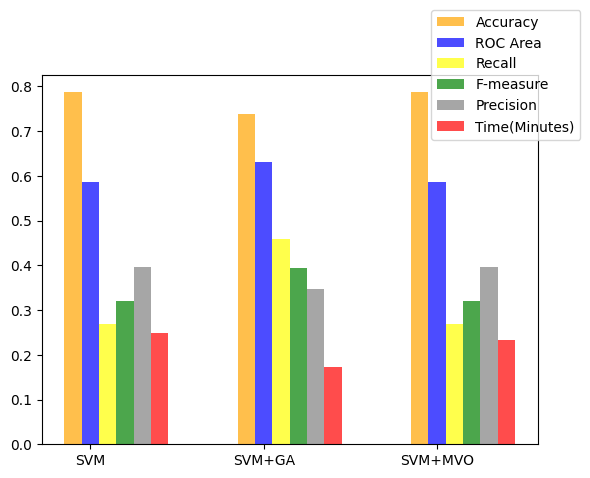

In [ ]:
Comparisons(accuracy_jm1, auc_jm1, recall_jm1, f1_jm1, pre_jm1 , time_jm1,1)

## 2) cm1 Dataset

[0 1 2]
[0.7999999999999999, 0.7000000000000001, 0.7933333333333332]
[0.6334033613445378, 0.70640756302521, 0.6297268907563024]
[0.4285714285714285, 0.7142857142857143, 0.4285714285714285]
[0.28571428571428564, 0.30769230769230765, 0.27906976744186046]
[0.21428571428571425, 0.19607843137254902, 0.20689655172413796]
[0.029748368263244628, 0.021678757667541505, 0.023300027847290038]


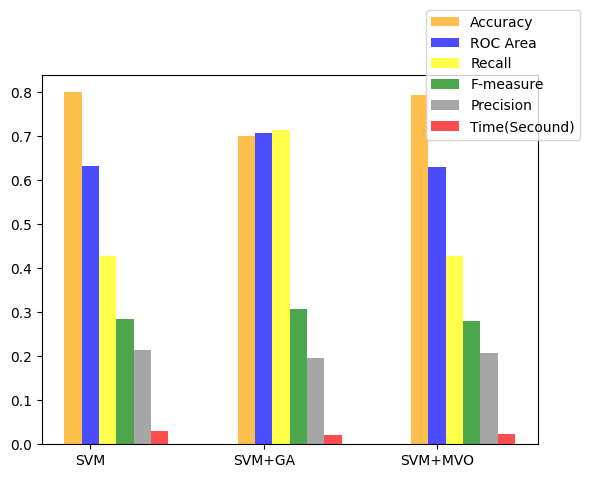

In [ ]:
Comparisons(accuracy_cm1, auc_cm1, recall_cm1, f1_cm1, pre_cm1, time_cm1, 0)

## 3) kc1 Dataset

[0 1 2]
[0.7914691943127962, 0.7725118483412323, 0.7930489731437599]
[0.701728351955307, 0.6948324022346368, 0.702659450651769]
[0.5729166666666667, 0.5833333333333333, 0.5729166666666667]
[0.4545454545454545, 0.4375, 0.4564315352697096]
[0.3767123287671233, 0.35000000000000003, 0.37931034482758624]
[0.33755013942718504, 0.2845853090286255, 0.3524463415145874]


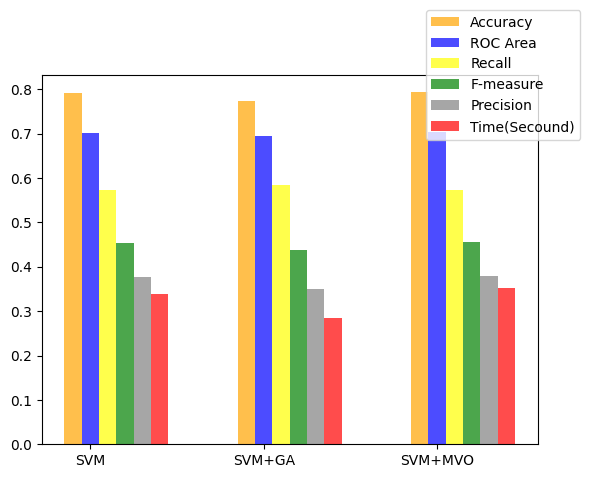

In [ ]:
Comparisons(accuracy_kc1, auc_kc1, recall_kc1, f1_kc1, pre_kc1, time_kc1,0)

## 4) kc2 Dataset

[0 1 2]
[0.8789808917197452, 0.8789808917197452, 0.8789808917197452]
[0.7508547008547007, 0.7508547008547007, 0.7508547008547007]
[0.5555555555555555, 0.5555555555555555, 0.5555555555555555]
[0.6122448979591837, 0.6122448979591837, 0.6122448979591837]
[0.6818181818181818, 0.6818181818181818, 0.6818181818181818]
[0.023361754417419434, 0.027063465118408202, 0.03192739486694336]


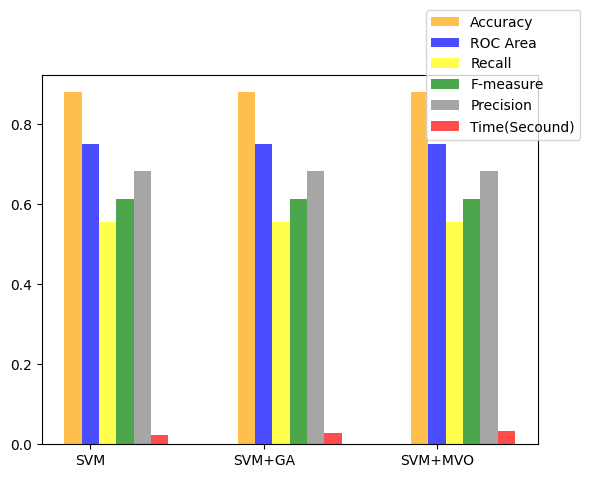

In [ ]:
Comparisons(accuracy_kc2, auc_kc2, recall_kc2, f1_kc2, pre_kc2, time_kc2, 0)

## 5) pc1 Dataset

[0 1 2]
[0.8198198198198197, 0.7237237237237238, 0.8018018018018018]
[0.6049795825771325, 0.5991379310344829, 0.5951111615245008]
[0.34482758620689663, 0.4482758620689654, 0.34482758620689663]
[0.25, 0.22033898305084748, 0.23255813953488375]
[0.19607843137254902, 0.14606741573033705, 0.1754385964912281]
[0.12817590236663817, 0.0884542465209961, 0.14113340377807618]


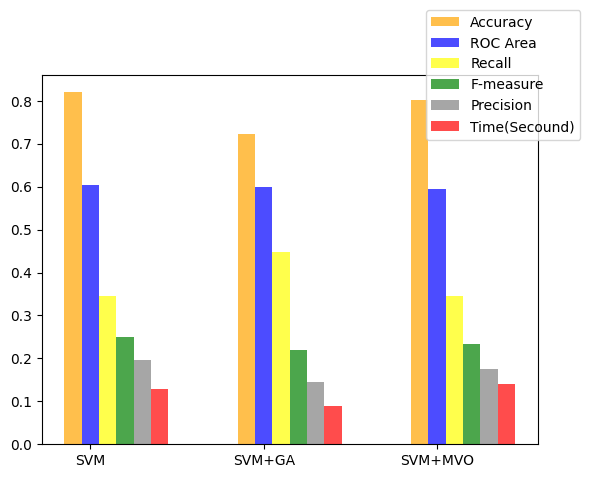

In [ ]:
Comparisons(accuracy_pc1, auc_pc1, recall_pc1, f1_pc1, pre_pc1, time_pc1, 0)

# **RF: train, testing & evaluate**
1. **without FS**
2. **with FS(GA)**
3. **with FS(MVO)**


## function to use

In [29]:
p_grid = { 'n_estimators':[1000, 2000],
           'max_depth':[6,8]}

In [30]:
import random

def fun2(X, y, X_test, y_test):
  start_time = 0.0
  time_arr = []
  acc_arr = []
  f1_arr = []
  auc_arr = []
  pre_arr = []
  recall_arr = []

  for i in range(10):
    start_time = time.time()
    rand = random.randint(0, 900)
    grid = GridSearchCV(RandomForestClassifier(n_jobs = 1, random_state = rand) ,param_grid= p_grid , verbose = 2)
    grid.fit(X, y)
    y_pred = grid.predict(X_test)


    time_arr.append(time.time() - start_time)
    acc_arr.append(metrics.accuracy_score(y_test, y_pred))
    f1_arr.append(metrics.f1_score(y_test, y_pred))
    auc_arr.append(metrics.roc_auc_score(y_test, y_pred))
    pre_arr.append(metrics.precision_score(y_test, y_pred))
    recall_arr.append(metrics.recall_score(y_test, y_pred))
  print(time_arr, acc_arr, f1_arr, auc_arr)
  avg_time = average(time_arr)
  avg_acc = average(acc_arr)
  avg_f1 = average(f1_arr)
  avg_auc = average(auc_arr)
  avg_pre = average(pre_arr)
  avg_recall = average(recall_arr)
  return avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall


## **1) RF without FS**

In [31]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(X_cm1, y_cm1, cm1_x_test, cm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_cm12.append(avg_time)
accuracy_cm12.append(avg_acc)
pre_cm12.append(avg_pre)
auc_cm12.append(avg_auc)
recall_cm12.append(avg_recall)
f1_cm12.append(avg_f1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.2s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.3s
[CV] END .....................max_depth=8, n_esti

In [32]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(X_jm1, y_jm1, jm1_x_test, jm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_jm12.append(avg_time)
accuracy_jm12.append(avg_acc)
pre_jm12.append(avg_pre)
auc_jm12.append(avg_auc)
recall_jm12.append(avg_recall)
f1_jm12.append(avg_f1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=  14.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  14.3s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  14.5s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  14.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  14.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  29.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  28.6s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  28.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  28.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  28.0s
[CV] END .....................max_depth=8, n_estimators=1000; total time=  18.4s
[CV] END .....................max_depth=8, n_esti

In [33]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(X_kc1, y_kc1, kc1_x_test, kc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc12.append(avg_time)
accuracy_kc12.append(avg_acc)
pre_kc12.append(avg_pre)
auc_kc12.append(avg_auc)
recall_kc12.append(avg_recall)
f1_kc12.append(avg_f1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   4.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   4.3s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.6s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   8.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   7.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   7.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   7.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   7.8s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   4.4s
[CV] END .....................max_depth=8, n_esti

In [34]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(X_kc2, y_kc2, kc2_x_test, kc2_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc22.append(avg_time)
accuracy_kc22.append(avg_acc)
pre_kc22.append(avg_pre)
auc_kc22.append(avg_auc)
recall_kc22.append(avg_recall)
f1_kc22.append(avg_f1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=8, n_esti

In [35]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(X_pc1, y_pc1, pc1_x_test, pc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_pc12.append(avg_time)
accuracy_pc12.append(avg_acc)
pre_pc12.append(avg_pre)
auc_pc12.append(avg_auc)
recall_pc12.append(avg_recall)
f1_pc12.append(avg_f1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.1s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.6s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.6s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   3.2s
[CV] END .....................max_depth=8, n_esti

## **2) RF + With FS(GA)**

In [36]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(cm1_ga_x_train, y_cm1, cm1_ga_x_test, cm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_cm12.append(avg_time)
accuracy_cm12.append(avg_acc)
pre_cm12.append(avg_pre)
auc_cm12.append(avg_auc)
recall_cm12.append(avg_recall)
f1_cm12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.3s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.1s
[CV] END .....................max_depth=8, n_esti

In [37]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(jm1_ga_x_train, y_jm1, jm1_ga_x_test, jm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_jm12.append(avg_time)
accuracy_jm12.append(avg_acc)
pre_jm12.append(avg_pre)
auc_jm12.append(avg_auc)
recall_jm12.append(avg_recall)
f1_jm12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=  12.5s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  11.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  11.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  11.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  11.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  24.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  23.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  23.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  23.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  23.8s
[CV] END .....................max_depth=8, n_estimators=1000; total time=  14.8s
[CV] END .....................max_depth=8, n_esti

In [38]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(kc1_ga_x_train, y_kc1, kc1_ga_x_test, kc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc12.append(avg_time)
accuracy_kc12.append(avg_acc)
pre_kc12.append(avg_pre)
auc_kc12.append(avg_auc)
recall_kc12.append(avg_recall)
f1_kc12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.3s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.4s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   1.7s
[CV] END .....................max_depth=8, n_esti

In [39]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(kc2_ga_x_train, y_kc2, kc2_ga_x_test, kc2_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc22.append(avg_time)
accuracy_kc22.append(avg_acc)
pre_kc22.append(avg_pre)
auc_kc22.append(avg_auc)
recall_kc22.append(avg_recall)
f1_kc22.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.5s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.8s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.3s
[CV] END .....................max_depth=8, n_esti

In [40]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(pc1_ga_x_train, y_pc1, pc1_ga_x_test, pc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_pc12.append(avg_time)
accuracy_pc12.append(avg_acc)
pre_pc12.append(avg_pre)
auc_pc12.append(avg_auc)
recall_pc12.append(avg_recall)
f1_pc12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.6s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.2s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.3s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.3s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.2s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   3.1s
[CV] END .....................max_depth=8, n_esti

## **3) RF + With FS(MVO)**

In [41]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(cm1_mvo_x_train, y_cm1, cm1_mvo_x_test, cm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_cm12.append(avg_time)
accuracy_cm12.append(avg_acc)
pre_cm12.append(avg_pre)
auc_cm12.append(avg_auc)
recall_cm12.append(avg_recall)
f1_cm12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.3s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.6s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.0s
[CV] END .....................max_depth=8, n_esti

In [42]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(jm1_mvo_x_train, y_jm1, jm1_mvo_x_test, jm1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_jm12.append(avg_time)
accuracy_jm12.append(avg_acc)
pre_jm12.append(avg_pre)
auc_jm12.append(avg_auc)
recall_jm12.append(avg_recall)
f1_jm12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=  10.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  10.5s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  10.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=  10.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   9.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  21.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  21.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  20.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  20.7s
[CV] END .....................max_depth=6, n_estimators=2000; total time=  20.9s
[CV] END .....................max_depth=8, n_estimators=1000; total time=  12.9s
[CV] END .....................max_depth=8, n_esti

In [43]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(kc1_mvo_x_train, y_kc1, kc1_mvo_x_test, kc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc12.append(avg_time)
accuracy_kc12.append(avg_acc)
pre_kc12.append(avg_pre)
auc_kc12.append(avg_auc)
recall_kc12.append(avg_recall)
f1_kc12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.1s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.5s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.9s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.7s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   4.0s
[CV] END .....................max_depth=8, n_esti

In [44]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(kc2_mvo_x_train, y_kc2, kc2_mvo_x_test, kc2_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_kc22.append(avg_time)
accuracy_kc22.append(avg_acc)
pre_kc22.append(avg_pre)
auc_kc22.append(avg_auc)
recall_kc22.append(avg_recall)
f1_kc22.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.0s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.6s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   3.8s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   4.3s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   1.8s
[CV] END .....................max_depth=8, n_esti

In [45]:
avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall = fun2(pc1_mvo_x_train, y_pc1, pc1_mvo_x_test, pc1_y_test)
print(avg_time, avg_acc, avg_f1, avg_auc, avg_pre, avg_recall)

time_pc12.append(avg_time)
accuracy_pc12.append(avg_acc)
pre_pc12.append(avg_pre)
auc_pc12.append(avg_auc)
recall_pc12.append(avg_recall)
f1_pc12.append(avg_f1)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.4s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   2.7s
[CV] END .....................max_depth=6, n_estimators=1000; total time=   3.2s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.5s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.4s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.1s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   5.3s
[CV] END .....................max_depth=6, n_estimators=2000; total time=   6.0s
[CV] END .....................max_depth=8, n_estimators=1000; total time=   2.8s
[CV] END .....................max_depth=8, n_esti

# **RF Model Comparisons**

In [83]:
from pylab import *


def Comparisons2(accuracy, auc, recall, f1, pre, time, t):
  #data to plot
  n_groups = 3 # without features, with GA, with MVO
  #create plot
  fig, ax = subplots()
  index = arange(n_groups)
  print(index)
  bar_width = 0.1
  opacity = 0.7

  print('acc: ', accuracy, sep = "\t")
  print('auc: ', auc, sep = "\t")
  print('recall: ', recall, sep = "\t")
  print('f1: ', f1, sep = "\t")
  print("pre :", pre, sep = "\t")
  print( 'time: ',time, sep = "\t")

  rects1 = bar(index, accuracy, bar_width, alpha = opacity, color = 'orange', label = 'Accuracy')
  rects2 = bar(index+bar_width, auc, bar_width, alpha = opacity, color = 'blue', label = 'ROC Area')
  rects3 = bar(index+bar_width*2, recall, bar_width, alpha = opacity, color = 'yellow', label = 'Recall')
  rects4 = bar(index+bar_width*3, f1, bar_width, alpha = opacity, color = 'green', label = 'F-measure')
  rects5 = bar(index+bar_width*4, pre, bar_width, alpha = opacity, color = 'grey', label = 'Precision')
  if(t == 1):
    time = [ti/3600 for ti in time]
    rects6 = bar(index+bar_width*5, time, bar_width, alpha = opacity, color = 'red', label = 'Time(Hours)')
  else:
      time = [ti/60 for ti in time]
      rects6 = bar(index+bar_width*5, time, bar_width, alpha = opacity, color = 'red', label = 'Time(Minutes)')


  xticks(index+bar_width, ('RF', 'RF+GA', 'RF+MVO'))
  legend()
  legend(loc ="center right", bbox_to_anchor=(1.1, 1.0))

## 1) jm1 Dataset

[0 1 2]
acc: 	[0.7589154411764707, 0.7605392156862745, 0.7661764705882353]
auc: 	[0.6619789773091811, 0.63558316758984, 0.6525011227785025]
recall: 	[0.5021806853582554, 0.429595015576324, 0.4651090342679128]
f1: 	[0.45037685570343167, 0.4137436659473617, 0.4389875737652266]
pre :	[0.40827204726144145, 0.39903149459584564, 0.4156494700260853]
time: 	[509.6061268568039, 424.6921839237213, 366.527391409874]


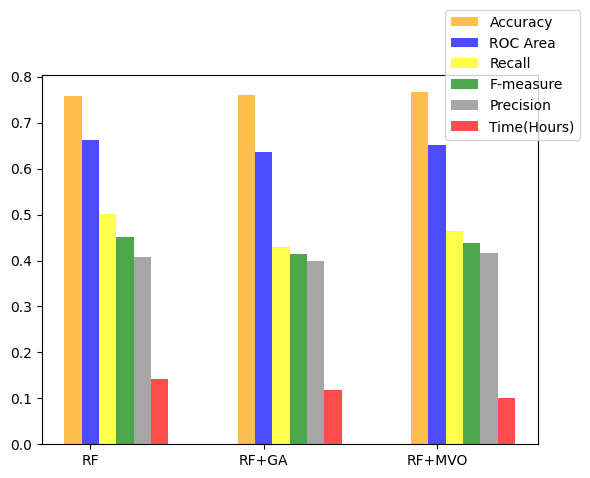

In [84]:
Comparisons2(accuracy_jm12, auc_jm12, recall_jm12, f1_jm12, pre_jm12, time_jm12, 1)

## 2) cm1 Dataset

[0 1 2]
acc: 	[0.8406666666666667, 0.8366666666666666, 0.8153333333333332]
auc: 	[0.6150528169014085, 0.6188380281690141, 0.6075704225352112]
recall: 	[0.3625, 0.375, 0.375]
f1: 	[0.19526616875893849, 0.19677419354838707, 0.17829195314489435]
pre :	[0.13367118388857518, 0.13339920948616596, 0.11701343101343101]
time: 	[72.97744836807252, 68.53395218849182, 67.29094014167785]


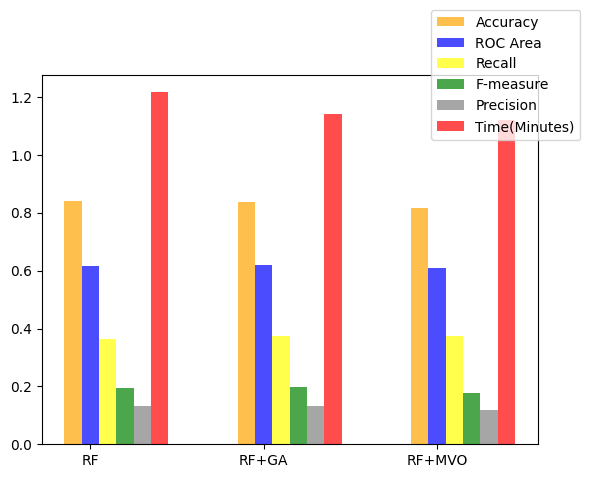

In [85]:
Comparisons2(accuracy_cm12, auc_cm12, recall_cm12, f1_cm12, pre_cm12, time_cm12, 2)

## 3) kc1 Dataset

[0 1 2]
acc: 	[0.8094786729857819, 0.1579778830963665, 0.7890995260663507]
auc: 	[0.6921597252039502, 0.4987762988407042, 0.6873475740661228]
recall: 	[0.5317647058823529, 0.9647058823529411, 0.5482352941176469]
f1: 	[0.428418489622168, 0.23529411764705882, 0.41112506772165397]
pre :	[0.3587404407734323, 0.13398692810457516, 0.32888760148465856]
time: 	[132.4294665336609, 57.75181357860565, 102.9377359867096]


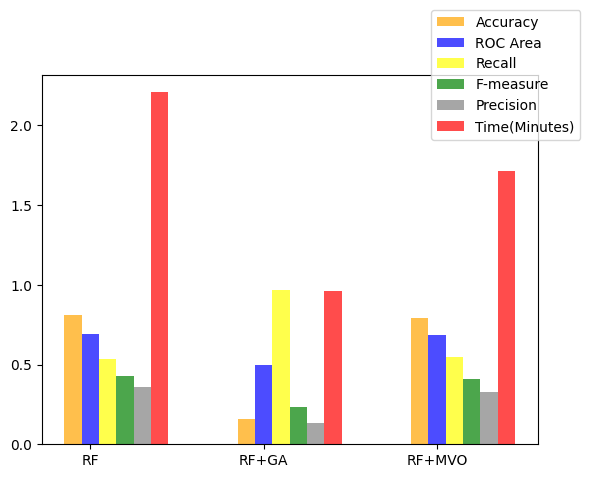

In [86]:
Comparisons2(accuracy_kc12, auc_kc12, recall_kc12, f1_kc12, pre_kc12, time_kc12, 2)

## 4) kc2 Dataset

[0 1 2]
acc: 	[0.7955414012738854, 0.8031847133757962, 0.8292993630573248]
auc: 	[0.7202583675866119, 0.7726218438050501, 0.8190986494421608]
recall: 	[0.6076923076923076, 0.7269230769230769, 0.8038461538461539]
f1: 	[0.4960794044665013, 0.5503762010420605, 0.6094374046700326]
pre :	[0.4192243863296494, 0.44297421177171614, 0.4908540636901385]
time: 	[68.52250382900237, 64.70832493305207, 60.918790912628175]


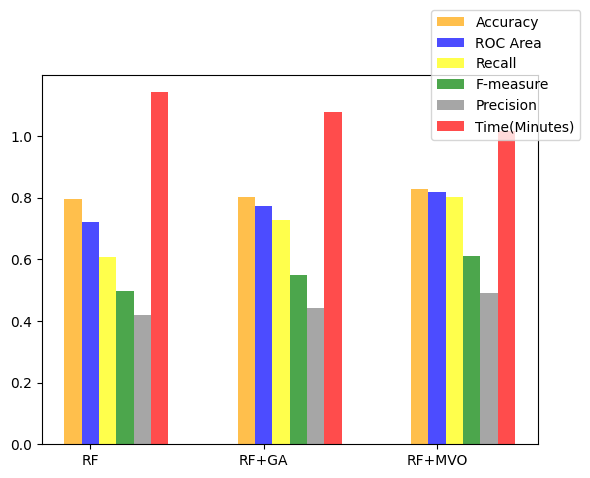

In [87]:
Comparisons2(accuracy_kc22, auc_kc22, recall_kc22, f1_kc22, pre_kc22, time_kc22, 2)

## 5) pc1 Dataset

[0 1 2]
acc: 	[0.8882882882882883, 0.8855855855855855, 0.8651651651651651]
auc: 	[0.7045231416549789, 0.699046283309958, 0.625687237026648]
recall: 	[0.491304347826087, 0.4826086956521739, 0.3478260869565217]
f1: 	[0.37784106696304526, 0.3682246345568533, 0.26278797646328056]
pre :	[0.3070017385806859, 0.29775937591727075, 0.21120983331509646]
time: 	[104.05243766307831, 92.50435092449189, 92.41926424503326]


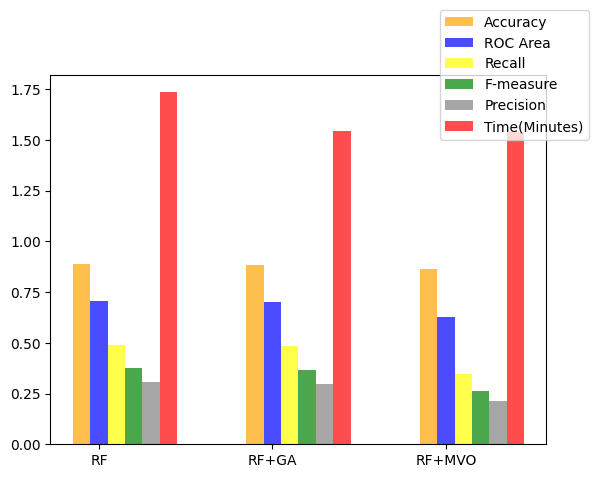

In [88]:
Comparisons2(accuracy_pc12, auc_pc12, recall_pc12, f1_pc12, pre_pc12, time_pc12, 2)